# EPs - MAC0417 Visão e Processamento de Imagens
### Leonardo Martinez Ikeda - NUSP 10262822

Este notebook contém os exercícios-programa desenvolvidos ao longo da disciplina MAC0417 (Visão e Processamento de Imagens) do IME-USP.

## EP1
Na primeira parte do EP, coletamos uma série de imagens de objetos diversos do dia-a-dia, seguindo um padrão para sua aquisição:
* 10 classes de objetos (ex: livro, garfo, faca, etc.)
* Entre 3 e 5 objetos por classe (ex: 4 livros diferentes, 5 facas diferentes, etc.)
* 3 variações de fundo por objeto (ex: piso texturado, toalha amarela, etc.)
* 4 variações de combinações de local e iluminação - interior/exterior x dia/noite
* 3 repetições para cada situação acima (ex: 3 fotos distintas do livro 1, com toalha amarela ao fundo, de dia e no exterior)

Em sua totalidade, o EP1 consiste em coletar essas base de imagens, construir e armazenar os metadados relativos à base, e ainda visualizar informações destes dados, por meio de tabelas e visualização de pequenas amostras das imagens de maneira semelhante a bases de imagens como o MNIST.

Antes de tudo, precisamos importar todas as bibliotecas que serão utilizadas:

In [1]:
import os
import urllib
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import random
from skimage import io
from IPython.display import clear_output

%matplotlib inline

## Dados

Primeiramente, iremos armazenar a base de dados coletada em disco local.

(**Atenção!** Será criado uma pasta chamada *ep01_data* no local de execução deste notebook, e as imagens totalizarão cerca de 545MB)

In [2]:
def load_images():
    if not os.path.exists("ep01_data"):
        os.makedirs("ep01_data")
    data_folder = "https://www.linux.ime.usp.br/~ikedaleo/mac0417/proc/"
    size = 1548
    data = []
    for i in range(1, size+1):
        filename = "photo_" + str(i).zfill(4) + ".jpg"
        data_url = data_folder + filename
        img_file = "./ep01_data/" + filename
        urllib.request.urlretrieve(data_url, img_file)
        print(filename)
        clear_output(wait=True)

In [3]:
print("Loading data...")
load_images()

photo_1548.jpg


## Metadados

Carregada a base, precisamos agora carregar os metadados criados contendo as informações sobre cada uma das imagens:

In [4]:
meta = "https://www.linux.ime.usp.br/~ikedaleo/mac0417/metadata_ep01.csv"
urllib.request.urlretrieve(meta, "./metadata_ep01.csv")
df = pd.read_csv("./metadata_ep01.csv")
df.head()

,arquivo,classe,objeto,fundo,local,iluminacao,numero
0,photo_0001.jpg,escova,1,piso_textura,fora,dia,1
1,photo_0002.jpg,escova,1,piso_textura,fora,dia,2
2,photo_1548.jpg,escova,1,piso_textura,fora,dia,3
3,photo_0003.jpg,escova,2,piso_textura,fora,dia,1
4,photo_0004.jpg,escova,2,piso_textura,fora,dia,2


## Visualização

### Tabelas Sumárias

Abaixo, temos funções responsáveis por imprimir tabelas sumárias da base de dados. A função `show_summary_table` imprime a tabela global, contendo informações gerais sobre a base, e também uma tabela detalhada para cada classe, contendo informações sobre cada uma das classes.

In [5]:
def show_class_table(obj_class, df):
    class_df = df[df["classe"] == obj_class]
    
    obj_count = len(class_df.objeto.unique())
    bgs = class_df.fundo.unique()
    reps = len(class_df.numero.unique())
    img_count = len(class_df.index)
    light_setting = df.loc[:, ['local', 'iluminacao']].drop_duplicates().values
    separator = "-----------------------------------------"
    
    print("=========================================")
    print('Tabela detalhada - Classe "' + str(obj_class) + '"')
    print("=========================================")
    print("Nome             | " + str(obj_class))
    print("Total de imagens | " + str(img_count))
    print("Objetos          | " + str(obj_count))
    print(separator)
    print("Fundos           | " , end="")
    for (i, bg) in enumerate(bgs):
        if i != 0:
            print("                 | ", end="")
        print(str(bg))
    print(separator)
    print("Iluminação       | " , end="")
    for (i, light) in enumerate(light_setting):
        if i != 0:
            print("                 | ", end="")
        print(str(light))
    print(separator)
    print("Repetições       | " + str(reps))

def show_summary_table(df):
    classes = df.classe.unique()
    img_count = len(df.index)
    
    db_size = 0
    src_path = "./ep01_data/"
    for _, _, filenames in os.walk(src_path):
        for f in filenames:
            db_size += os.path.getsize(src_path + f)                
    db_size /= 1024**2
    
    sample_img = PIL.Image.open(src_path + "photo_0001.jpg")
    
    print("=========================================")
    print("Tabela Global Sumária")
    print("=========================================")
    print("Número de classes     | " + str(len(classes)))
    print("Número de imagens     | " + str(img_count))
    print("Tamanho da base (MB)  | " + str(db_size))
    print("Resolução das imagens | " + str(sample_img.size))

    print("")
    for obj_class in classes:
        show_class_table(obj_class, df)
        print("")

In [6]:
show_summary_table(df)

Tabela Global Sumária
Número de classes     | 10
Número de imagens     | 1548
Tamanho da base (MB)  | 529.527117729187
Resolução das imagens | (1440, 1920)

Tabela detalhada - Classe "escova"
Nome             | escova
Total de imagens | 180
Objetos          | 5
-----------------------------------------
Fundos           | piso_textura
                 | toalha_marrom
                 | toalha_amarela
                 | piso_liso
-----------------------------------------
Iluminação       | ['fora' 'dia']
                 | ['dentro' 'dia']
                 | ['fora' 'noite']
                 | ['dentro' 'noite']
-----------------------------------------
Repetições       | 3

Tabela detalhada - Classe "caneca"
Nome             | caneca
Total de imagens | 144
Objetos          | 4
-----------------------------------------
Fundos           | piso_textura
                 | toalha_amarela
                 | toalha_marrom
                 | piso_liso
-----------------------------------------
I

### Visualização de amostras

Por fim, vejamos uma pequena amostra aleatória de imagens para cada classe:

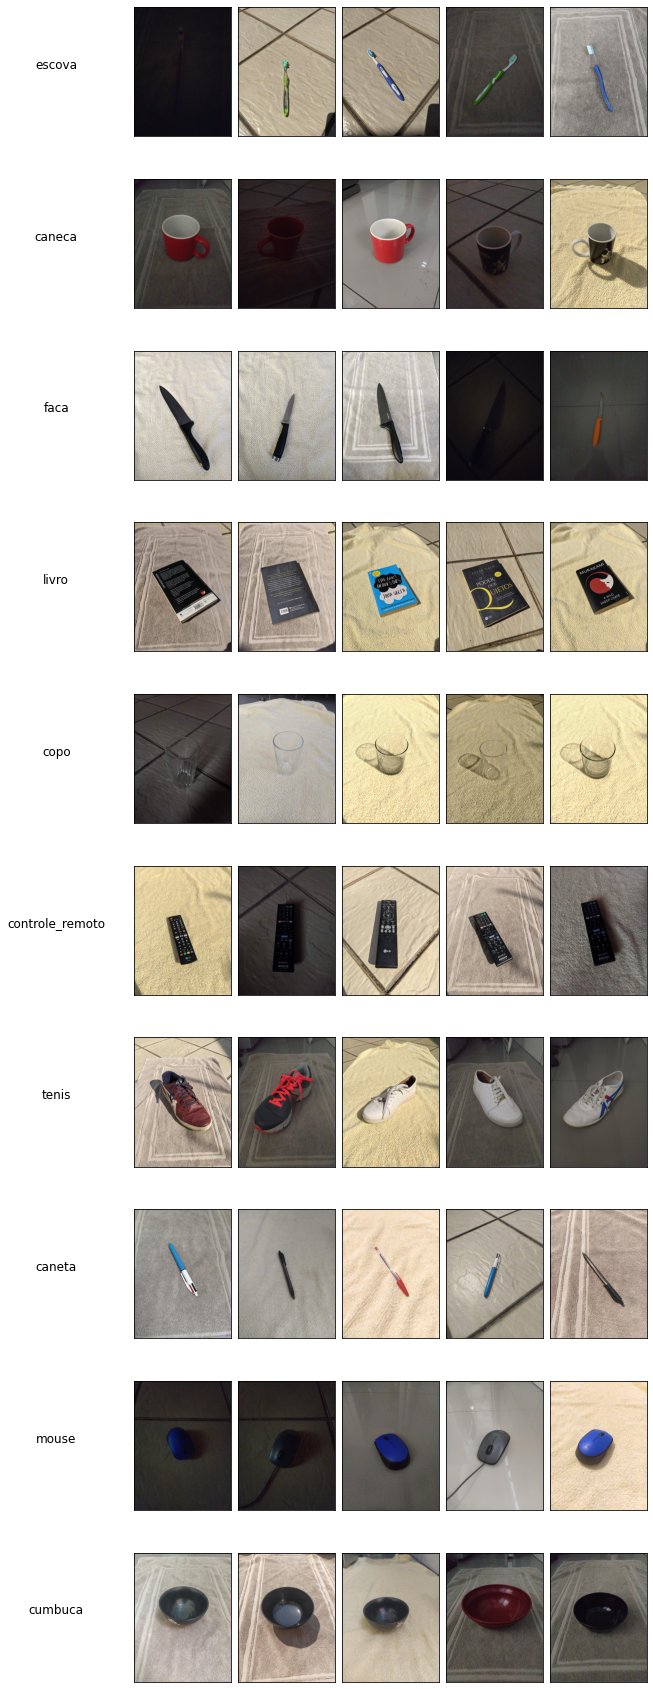

In [9]:
classes = list(df.classe.unique())
num_cols = 5
files = []
for obj_class in classes:
    class_df = df[df['classe'] == obj_class]
    obj_files = list(class_df.arquivo.unique())
    files.append(random.sample(obj_files, num_cols))
    
rows = ['{}'.format(classe) for classe in classes]
fig, axes = plt.subplots(nrows=len(classes), ncols=num_cols, figsize=(9, 24))
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')
    ax.yaxis.set_label_coords(-0.8, 0.5)
    
for r in range(len(classes)):
    for c in range(num_cols):
        fpath = "./ep01_data/" + files[r][c]
        img = PIL.Image.open(fpath)
        axes[r,c].imshow(img)
        axes[r,c].tick_params(axis='both', which='both', length=0)
        plt.setp(axes[r,c].get_xticklabels(), visible=False)
        plt.setp(axes[r,c].get_yticklabels(), visible=False)
    
fig.tight_layout()
plt.show()